In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [40]:
파일경로 = "https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/boston.csv"
col = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']
boston = pd.read_csv(파일경로)

df = pd.DataFrame(boston.values, columns = col)

In [41]:
df.rename(columns={'medv':'TARGET'})

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,36.2


In [43]:
scaler = StandardScaler()
scaler.fit(df.values[:,:-1])
df.values[:,:-1] = scaler.transform(df.values[:,:-1]).round(4)

df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,-0.4132,-0.4877,0.1157,-0.2726,0.1581,0.4393,0.0187,-0.6258,-0.9828,-0.8032,1.1765,0.3872,-0.4181,22.4
502,-0.4152,-0.4877,0.1157,-0.2726,0.1581,-0.2345,0.2889,-0.7166,-0.9828,-0.8032,1.1765,0.4411,-0.5008,20.6
503,-0.4134,-0.4877,0.1157,-0.2726,0.1581,0.9850,0.7974,-0.7737,-0.9828,-0.8032,1.1765,0.4411,-0.9830,23.9
504,-0.4078,-0.4877,0.1157,-0.2726,0.1581,0.7257,0.7370,-0.6684,-0.9828,-0.8032,1.1765,0.4032,-0.8653,22.0
505,-0.4150,-0.4877,0.1157,-0.2726,0.1581,-0.3628,0.4347,-0.6132,-0.9828,-0.8032,1.1765,0.4411,-0.6691,11.9


In [44]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [45]:
data = torch.from_numpy(df.values).float()

y = data[:,-1:] # 마지막 열만 포함
x = data[:,:-1] # 마지막 열을 제외한 모든 열

In [46]:
n_epochs = 200000
learning_rate = 1e-4
print_interval = 10000

In [55]:
class MyModel(nn.Module) :
	def __init__(self, input_dim, output_dim) : 
		self.input_dim = input_dim
		self.output_dim = output_dim

		super().__init__()

		self.linear1 = nn.Linear(input_dim, 3)
		self.linear2 = nn.Linear(3,3)
		self.linear3 = nn.Linear(3,3)
		self.linear4 = nn.Linear(3, output_dim)
		self.act = nn.ReLU()

	def forward(self,x) :
		h1 = self.act(self.linear1(x))
		h2 = self.act(self.linear2(h1))
		h3 = self.act(self.linear3(h2))
		y = self.linear4(h3)
	
		return y

model = MyModel(x.size(-1), y.size(-1))

optimizer = optim.SGD(model.parameters(), lr = learning_rate)

for i in range(n_epochs) :
	y_hat = model(x)
	loss = F.mse_loss(y_hat,y)

	optimizer.zero_grad()
	loss.backward()

	optimizer.step()

	if (i+1) %print_interval == 0 :
		print('Epoch %d : loss = %.4e'%(i+1, loss))

Epoch 10000 : loss = 1.1588e+01
Epoch 20000 : loss = 9.9631e+00
Epoch 30000 : loss = 9.5825e+00
Epoch 40000 : loss = 9.2877e+00
Epoch 50000 : loss = 8.9667e+00
Epoch 60000 : loss = 8.6278e+00
Epoch 70000 : loss = 8.3967e+00
Epoch 80000 : loss = 8.1637e+00
Epoch 90000 : loss = 7.8988e+00
Epoch 100000 : loss = 7.7408e+00
Epoch 110000 : loss = 7.6268e+00
Epoch 120000 : loss = 7.5477e+00
Epoch 130000 : loss = 7.4812e+00
Epoch 140000 : loss = 7.4158e+00
Epoch 150000 : loss = 7.3596e+00
Epoch 160000 : loss = 7.3197e+00
Epoch 170000 : loss = 7.2922e+00
Epoch 180000 : loss = 7.2735e+00
Epoch 190000 : loss = 7.2601e+00
Epoch 200000 : loss = 7.2493e+00


In [56]:
model2 = nn.Sequential(
    nn.Linear(x.size(-1),3),
    nn.LeakyReLU(),
    nn.Linear(3,3),
    nn.LeakyReLU(),
    nn.Linear(3,3),
    nn.LeakyReLU(),
    nn.Linear(3,3),
    nn.LeakyReLU(),
    nn.Linear(3,y.size(-1)),
)

print(model2)


Sequential(
  (0): Linear(in_features=13, out_features=3, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=3, out_features=3, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=3, out_features=3, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=3, out_features=3, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=3, out_features=1, bias=True)
)


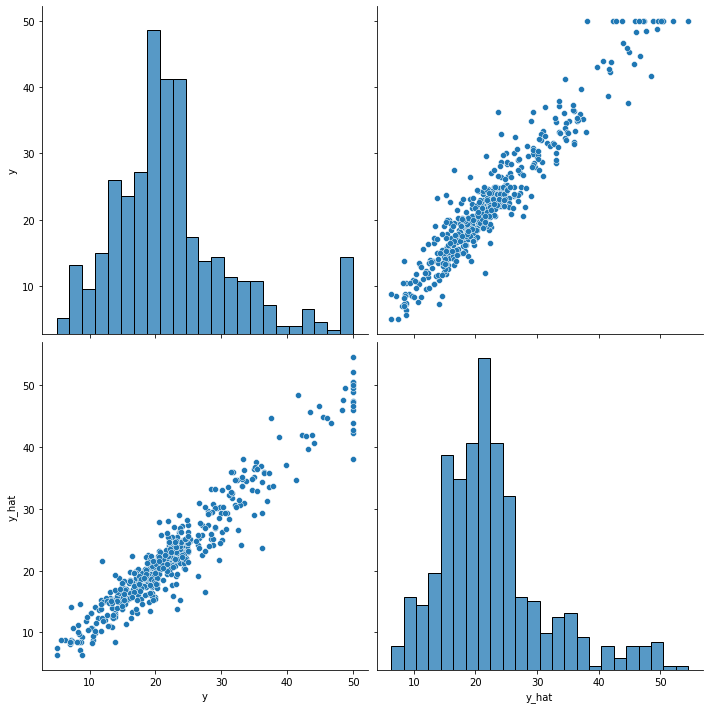

In [58]:
df = pd.DataFrame(torch.cat([y, y_hat],dim =1).detach().numpy(), columns = ["y", "y_hat"])

sns.pairplot(df, height=5)
plt.show()